# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

    # Stop the loop once we have 300 cities -- more that that keeps breaking 
    if len(cities) == 300:
        break

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 300


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_name = "city"
# city_url = f'{url}&appid={weather_api_key}&q={city_name}&units={units}'


In [4]:
#requests.get(city_url).json()
# response =requests.get(city_url).json()
# response

In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&appid={weather_api_key}&q={city}&units={units}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting-- removed for time constraint issues 
    # time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | buala
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | kerikeri
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | dickinson
Processing Record 12 of Set 1 | puerto leguizamo
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | sabang
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | brookings
Processing Record 21 of Set 1 | hohhot
Processing Record 22 of Set 1 | minot air forc

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          289
Lat           289
Lng           289
Max Temp      289
Humidity      289
Cloudiness    289
Wind Speed    289
Country       289
Date          289
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,56.71,88,0,3.44,US,1723938453
1,utrik,11.2278,169.8474,83.30,76,96,17.20,MH,1723938453
2,isafjordur,66.0755,-23.1240,36.57,98,100,9.06,IS,1723938455
3,tiksi,71.6872,128.8694,56.19,53,56,16.67,RU,1723938456
4,aasiaat,68.7098,-52.8699,32.23,93,80,2.95,GL,1723938457


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,56.71,88,0,3.44,US,1723938453
1,utrik,11.2278,169.8474,83.30,76,96,17.20,MH,1723938453
2,isafjordur,66.0755,-23.1240,36.57,98,100,9.06,IS,1723938455
3,tiksi,71.6872,128.8694,56.19,53,56,16.67,RU,1723938456
4,aasiaat,68.7098,-52.8699,32.23,93,80,2.95,GL,1723938457


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

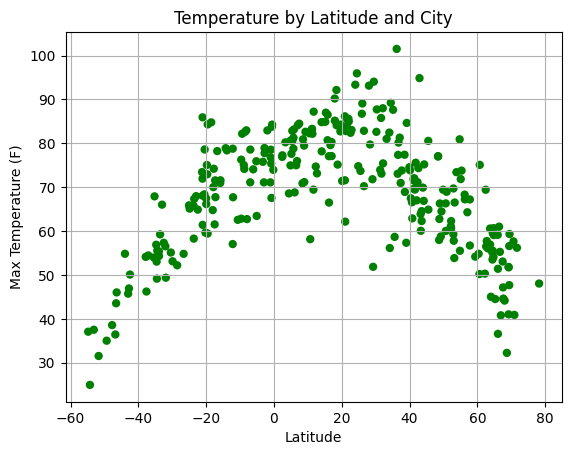

In [27]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
x_axis = latitude
y_axis = temperature
plt.scatter(x_axis, y_axis, facecolors="green", edgecolors="none")

# Incorporate the other graph properties
plt.title("Temperature by Latitude and City")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Lat_vs_Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

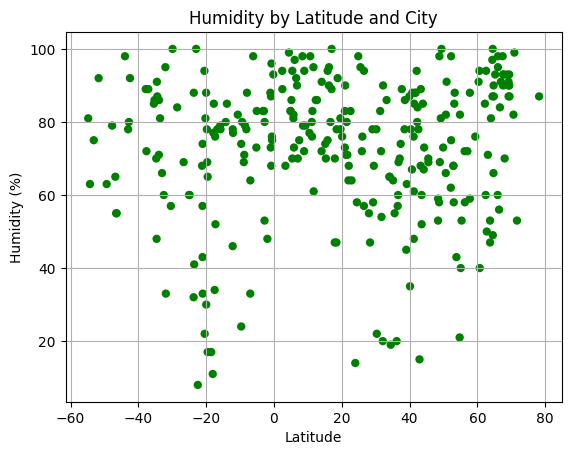

In [28]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
x_axis = latitude
y_axis = humidity
plt.scatter(x_axis, y_axis, facecolors="green", edgecolors="none")

# Incorporate the other graph properties
plt.title("Humidity by Latitude and City")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

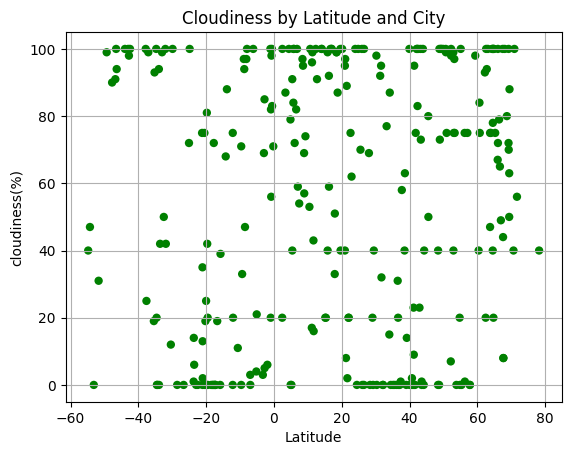

In [29]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
x_axis = latitude
y_axis = cloudiness
plt.scatter(x_axis, y_axis, facecolors="green", edgecolors="none")

# Incorporate the other graph properties
plt.title("Cloudiness by Latitude and City")
plt.xlabel("Latitude")
plt.ylabel("cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

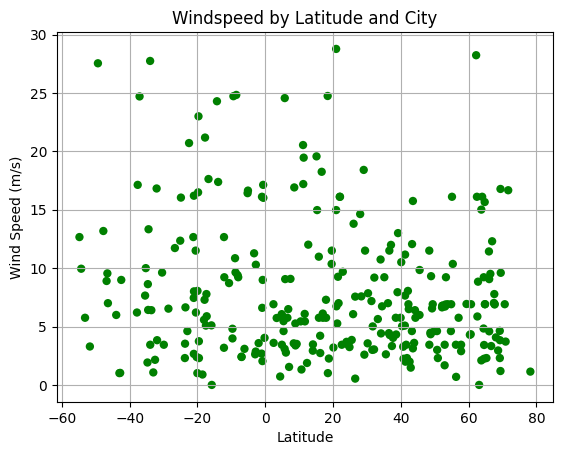

In [31]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
x_axis = latitude
y_axis = wind_speed
plt.scatter(x_axis, y_axis, facecolors="green", edgecolors="none")

# Incorporate the other graph properties
plt.title("Windspeed by Latitude and City")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Lat_vs_Windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
def linear_regression_plot(df, hemisphere, x_col, y_col):
    # Filter the DataFrame for the specified hemisphere
    if hemisphere.lower() == 'northern':
        df_filtered = df[df['Lat'] >= 0]
    elif hemisphere.lower() == 'southern':
        df_filtered = df[df['Lat'] < 0]
    else:
        print("Invalid hemisphere specified. Choose 'northern' or 'southern'.")
        return
    
    # Extract data for plotting
    x_data = df_filtered[x_col]
    y_data = df_filtered[y_col]
    title = f'{hemisphere.capitalize()} Hemisphere: {y_col} by Latitude and City'

    # Perform linear regression
    linear_regression = linregress(x_data, y_data)
    y_regression = x_data * linear_regression.slope + linear_regression.intercept
    
    # Create scatter plot with regression line
    plt.scatter(x_data, y_data, facecolors="green", edgecolors="none")
    
    # Annotate with linear equation
    linear_equation = f"y = {round(linear_regression.slope, 2)}x + {round(linear_regression.intercept, 2)}"
    annotation_x = x_data.min()
    annotation_y = y_data.max()
    
    plt.plot(x_data, y_regression, "-", color="red")
    plt.annotate(linear_equation, xy=(annotation_x, annotation_y), color="red")
    
    # Set plot labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_col)
    plt.title(title)
    
    
    # Print r-value
    print(f"The r-value is: {linear_regression.rvalue}")
    
    # Show plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,56.71,88,0,3.44,US,1723938453
1,utrik,11.2278,169.8474,83.30,76,96,17.20,MH,1723938453
2,isafjordur,66.0755,-23.1240,36.57,98,100,9.06,IS,1723938455
3,tiksi,71.6872,128.8694,56.19,53,56,16.67,RU,1723938456
4,aasiaat,68.7098,-52.8699,32.23,93,80,2.95,GL,1723938457


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,buala,-8.1450,159.5921,82.96,78,97,9.40,SB,1723938457
6,luderitz,-26.6481,15.1594,54.81,69,0,11.72,NaN,1723938457
7,kerikeri,-35.2268,173.9474,67.91,86,93,10.00,NZ,1723938457
8,waitangi,-43.9535,-176.5597,54.82,98,100,5.99,NZ,1723938353
9,afaahiti,-17.7500,-149.2833,74.21,85,72,21.18,PF,1723938458


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.732079318298032


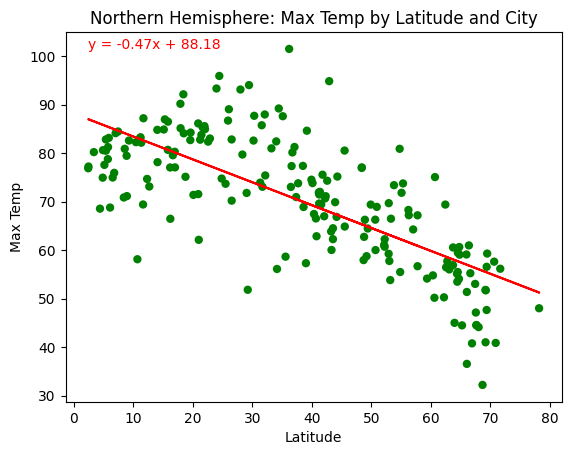

In [36]:
# Linear regression on Northern Hemisphere
linear_regression_plot(city_data_df, 'northern', 'Lat', 'Max Temp')

The r-value is: 0.8540007461904379


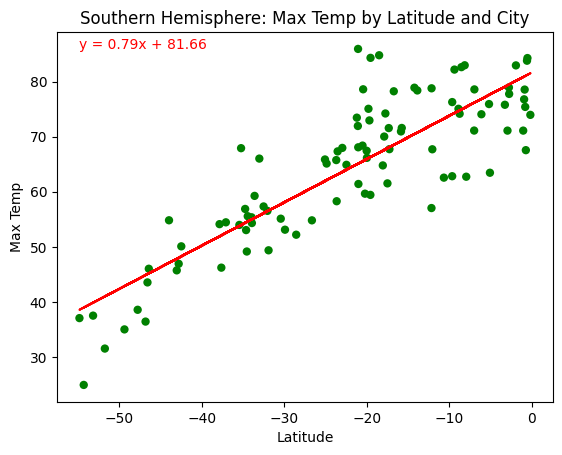

In [37]:
# Linear regression on Southern Hemisphere
linear_regression_plot(city_data_df, 'southern', 'Lat', 'Max Temp')

**Discussion about the linear relationship:** Northern and Southern hemispheres have an inverse temperature relationship. This is to be expected.  Summer in the north is Winter in the south and vice-versa.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.04161202391353353


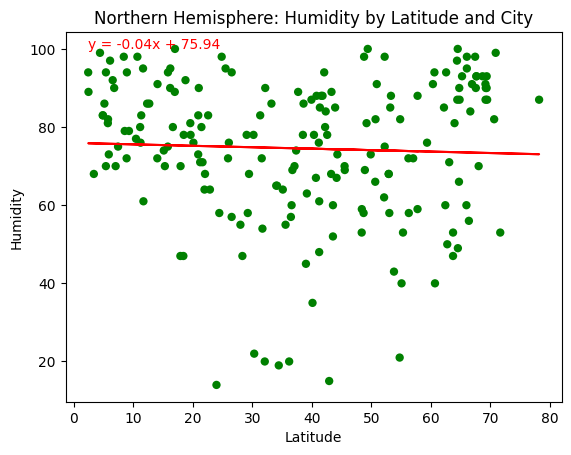

In [38]:
# Northern Hemisphere
linear_regression_plot(city_data_df, 'northern', 'Lat', 'Humidity')

The r-value is: -0.04041886363742094


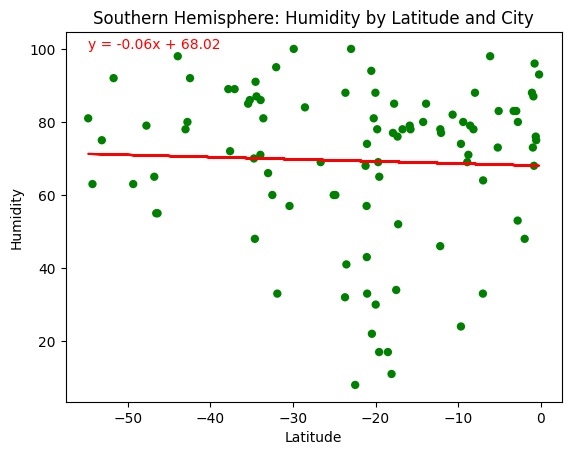

In [39]:
# Southern Hemisphere
linear_regression_plot(city_data_df, 'southern', 'Lat', 'Humidity')

**Discussion about the linear relationship:** There is not a significant linear relationship within humidity in northern and southern hemispheres.  There is only a slight correlation between the closeness to the equator and a slighly lower humidity readings.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.020523790896703503


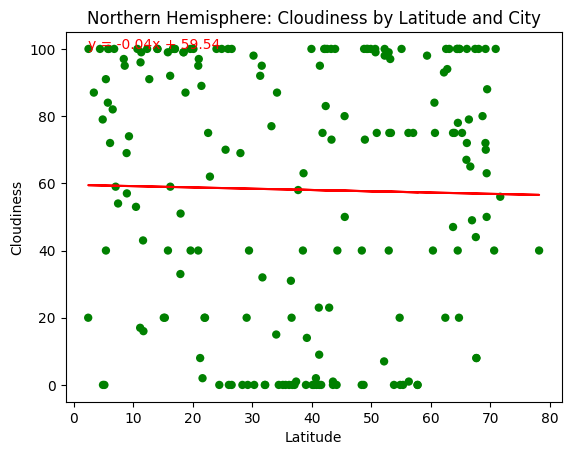

In [40]:
# Northern Hemisphere
linear_regression_plot(city_data_df, 'northern', 'Lat', 'Cloudiness')

The r-value is: -0.13607922362945632


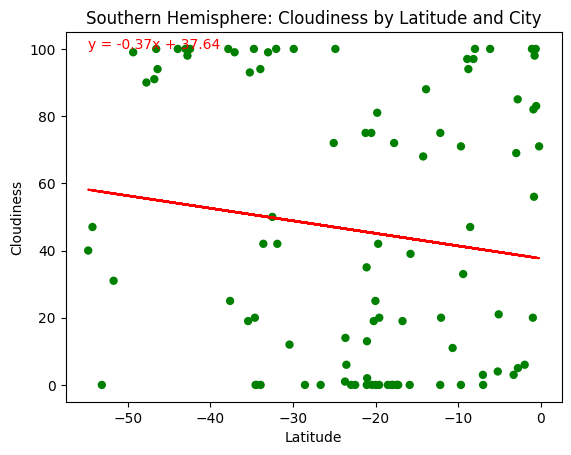

In [43]:
# Southern Hemisphere
linear_regression_plot(city_data_df, 'southern', 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** Cloudiness increases slightly closer to the equator in the the north, but this trend is much more pronounced and opposite in the southern hemisphere suggesting a different localized weather pattern than in the north.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07058209425147456


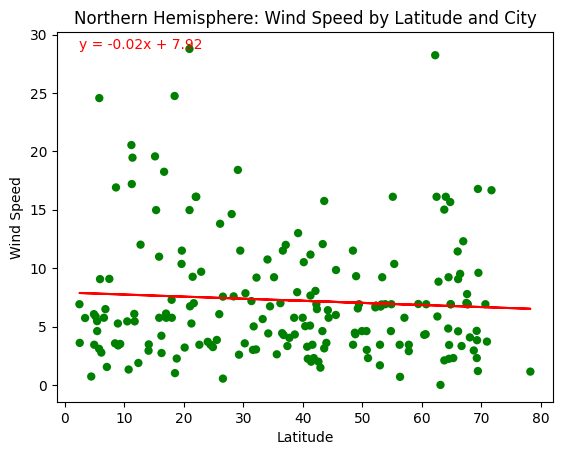

In [45]:
# Northern Hemisphere
linear_regression_plot(city_data_df, 'northern', 'Lat', 'Wind Speed')

The r-value is: -0.012337979867887159


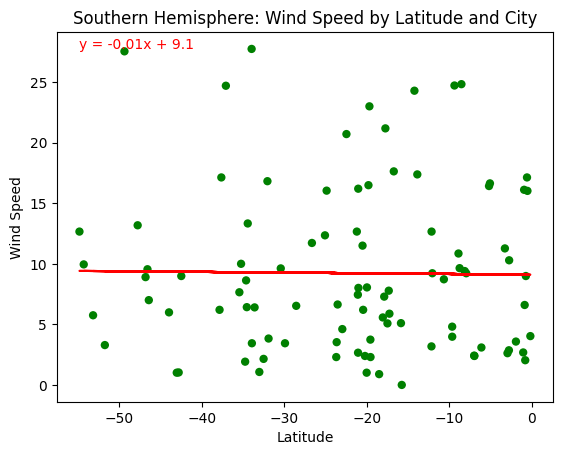

In [46]:
# Southern Hemisphere
linear_regression_plot(city_data_df, 'southern', 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** In both north and south, wind speed generally stays under 10 mph.  There is not any significant trend across latitudes but it might be interesting to review outliers close to the equator.